<font size='4' color='blue'>

<b>EXPECTED VALUE : </b>   
    
According to the law of large numbers, if we flip a coin a large number of times, the average result will be closer <br>
to the expected value of 0.5.<br>

In statistics and probability analysis, the expected value is calculated by multiplying each of the possible outcomes <br>
by the likelihood each outcome will occur and then summing all of those values.
    
</font>


In [285]:
import numpy as np
import pandas as pd
from collections import Counter as C
import matplotlib.pyplot as plt

In [200]:
# Expected Value Calculation 
# multiply each value of the random variable by its probability and add the products. 


In [296]:
# consider numbers 1 to 10

prob = 1/10
rv   = np.array([1,2,3,4,5,6,7,8,9,10])
print(rv*prob)
print(sum(rv*prob))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
5.500000000000001


In [295]:
prob = 1/6
rv   = np.array([1,2,3,4,5,6])
print(rv*prob)
print(sum(rv*prob))

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]
3.5


In [298]:
# consider a coin

prob = .5
rv   = np.array([1,0])
print(rv*prob)
print(sum(rv*prob))

[0.5 0. ]
0.5


<font size='2' color='blue'>
GAME 1 : <br>

Fee   :  0              <br>
Heads :  Win  10        <br>
Tails :  Lose 8         <br>

Calculate Expected Value     
</font>

In [300]:
# Expected Value :
((.5 * 10) + (.5 * -8)) - 0

1.0

In [247]:
# Let us prove through an experiment that the Expected Value calculated above is correct :

Game1Fee = 0
Game1Heads = 10
Game1Tails = -8

N = 1000000

X = np.random.choice(['Heads', 'Tails'], N )
df1 = pd.DataFrame(X, columns=['Random_Variable'])
df1['Game1'] = np.where(df1['Random_Variable']=='Heads', Game1Heads, Game1Tails)
df1['Game1Fee'] = Game1Fee
df1['Game1NetGain'] = df1.Game1 - df1.Game1Fee

In [314]:
np.sum(df1.Game1NetGain)/N

0.99739

In [ ]:
df1['Game1CumGain'] = np.cumsum(df1.Game1NetGain)
df1['Game1Expected_Value'] = df1.Game1CumGain/(df1.index+1)

In [323]:
df1.tail()

,Random_Variable,Game1,Game1Fee,Game1NetGain,Game1CumGain,Game1Expected_Value
999995,Heads,10,0,10,997350,0.997354
999996,Heads,10,0,10,997360,0.997363
999997,Heads,10,0,10,997370,0.997372
999998,Heads,10,0,10,997380,0.997381
999999,Heads,10,0,10,997390,0.997390


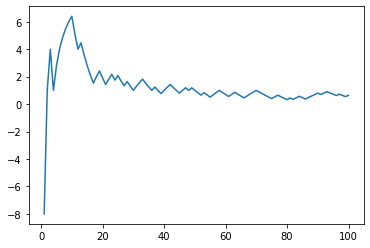

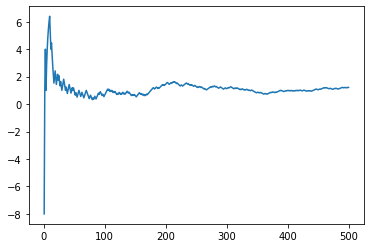

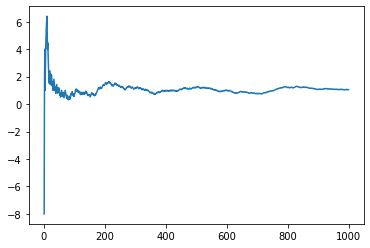

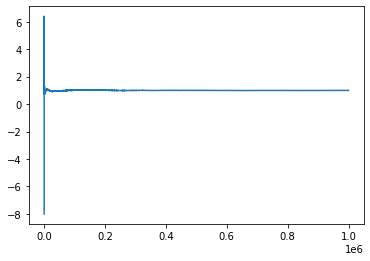

In [324]:
for i in [100, 500, 1000, N]  :
    plt.plot(list(df1.index[:i]+1), df1.Game1Expected_Value[:i])
    plt.show()

In [208]:
x = np.random.choice(['Heads', 'Tails'], 10000 )
d = C(x)
d

Counter({'Heads': 5031, 'Tails': 4969})

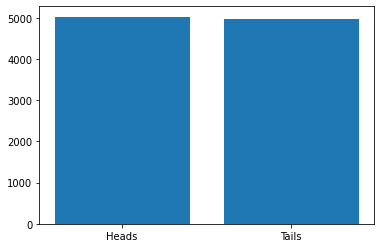

In [209]:
plt.xticks(None)
plt.bar(d.keys(), d.values())
plt.show()

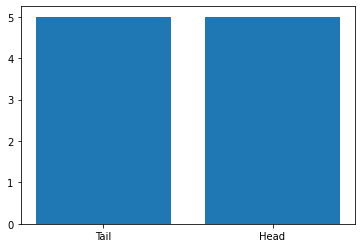

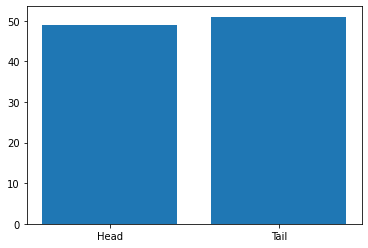

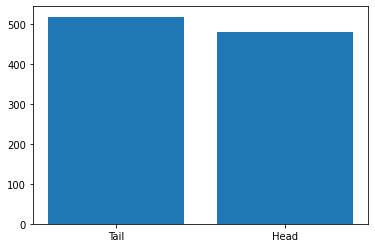

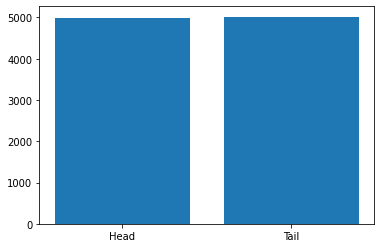

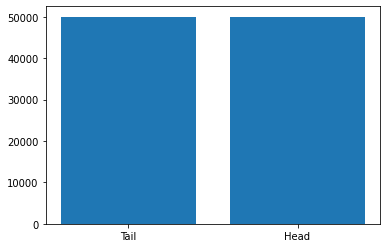

In [210]:
jump = [10,100,1000, 10000, 100000]
for i in jump : 
    x = np.random.choice(['Head','Tail'], i) 
    d = C(x)
    plt.xlim(.5, 0,1, 1.5)
    plt.xticks(None)
    plt.bar(d.keys(), d.values())
    plt.show()
    

In [211]:
df = pd.DataFrame(x,columns=['HT'])
df['HeadCount'] = np.where(df.HT == 'Head', 1, 0 )
df['TailCount'] = np.where(df.HT == 'Tail', 1, 0 )
df['HeadRatio'] = np.cumsum(df.HeadCount)/(df.index+1)
df['TailRatio'] = np.cumsum(df.TailCount)/(df.index+1)

In [184]:
df.tail()

,HT,HeadCount,TailCount,HeadRatio,TailRatio
99995,Tail,0,1,0.499930,0.500070
99996,Head,1,0,0.499935,0.500065
99997,Tail,0,1,0.499930,0.500070
99998,Tail,0,1,0.499925,0.500075
99999,Head,1,0,0.499930,0.500070


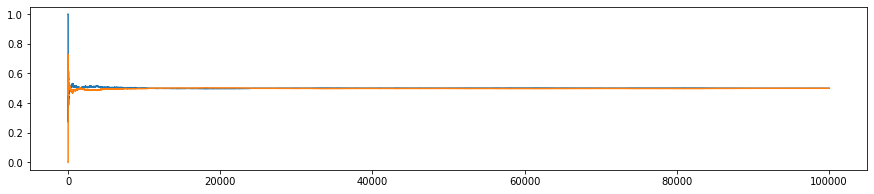

In [185]:
plt.figure(figsize=(15, 3))
plt.plot(df.index+1, df.HeadRatio)
plt.plot(df.index+1, df.TailRatio)
plt.show()

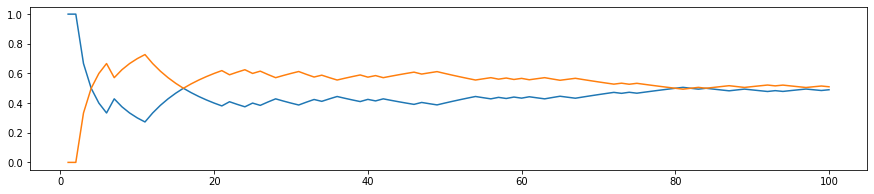

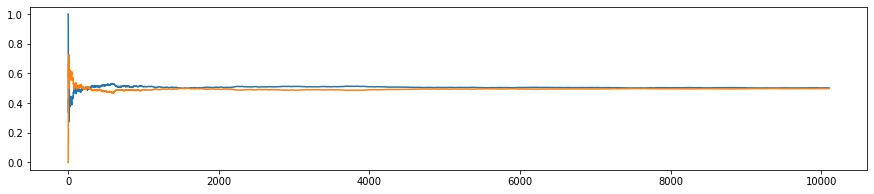

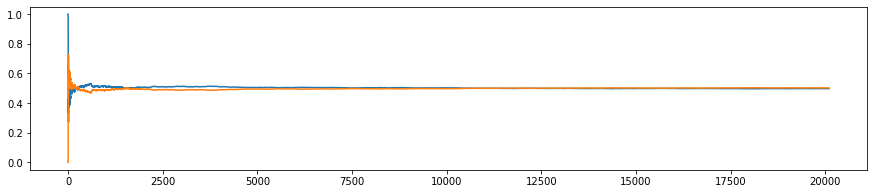

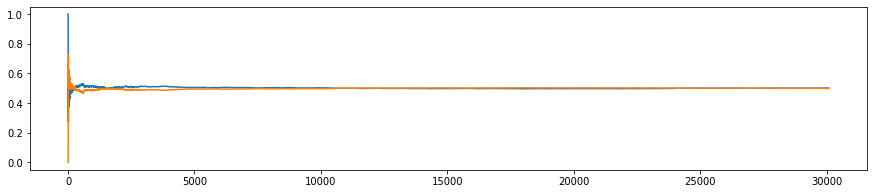

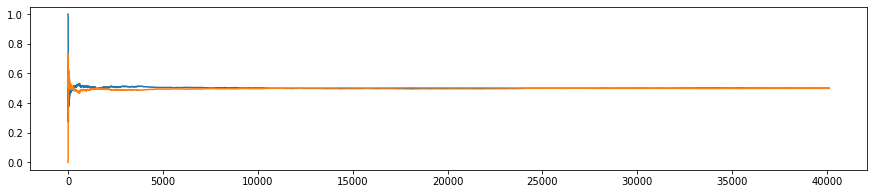

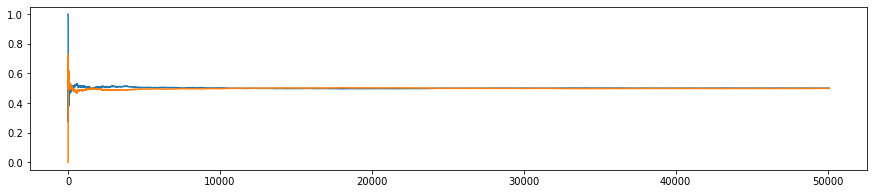

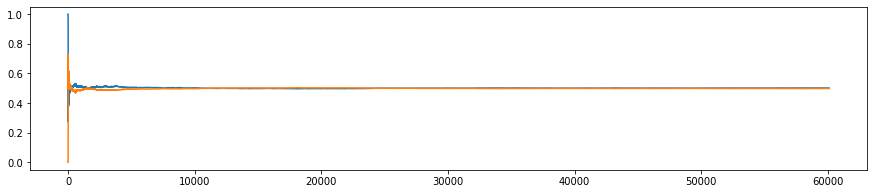

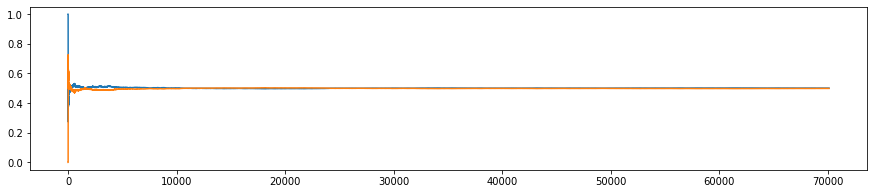

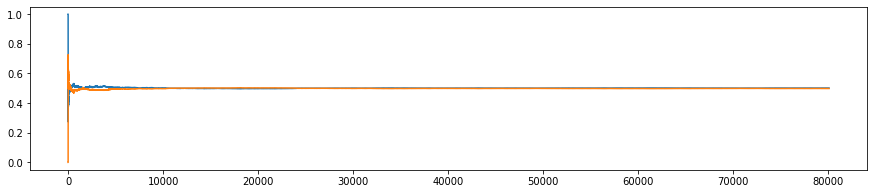

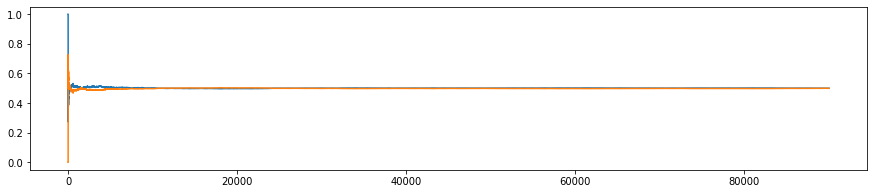

In [186]:
for i in range(100, len(df), 10000) :
    plt.figure(figsize=(15, 3))
    plt.plot((df.index+1)[:i], df.HeadRatio[:i])
    plt.plot((df.index+1)[:i], df.TailRatio[:i])
    plt.show()

In [188]:
df.tail(5)

,HT,HeadCount,TailCount,HeadRatio,TailRatio
99995,Tail,0,1,0.499930,0.500070
99996,Head,1,0,0.499935,0.500065
99997,Tail,0,1,0.499930,0.500070
99998,Tail,0,1,0.499925,0.500075
99999,Head,1,0,0.499930,0.500070
